In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir

file_dir = 'Preprocessing/pidato'

file_name = listdir(file_dir)
print(file_name)

pidato_df = pd.DataFrame(index=range(len(file_name)), columns=['FileName', 'Content'])

for i, f_name in enumerate(file_name):
    file = open(file_dir + '/' + f_name, 'r', encoding='utf-8')
    file_content = file.readlines()
    file.close()

    pidato_df.at[i, 'FileName'] = file_name[i]
    pidato_df.at[i, 'Content'] = file_content[0]

pidato_df.columns = ['FileName', 'Content']

print(pidato_df)

['BattleCreekDec19_2019.txt', 'ColoradorSpringsFeb20_2020.txt', 'DallasOct17_2019.txt', 'FayettevilleSep19_2020.txt', 'FayettevilleSep9_2019.txt', 'GreenvilleJul17_2019.txt', 'HendersonSep13_2020.txt', 'LasVegasFeb21_2020.txt', 'LatrobeSep3_2020.txt', 'LexingtonNov4_2019.txt', 'MilwaukeeJan14_2020.txt', 'MindenSep12_2020.txt', 'MinneapolisOct10_2019.txt', 'MosineeSep17_2020.txt', 'NewHampshireAug28_2020.txt', 'NewHampshireFeb10_2020.txt', 'NewMexicoSep16_2019.txt', 'OhioSep21_2020.txt', 'PittsburghSep22_2020.txt', 'TexasSep23_2019.txt', 'TupeloNov1_2019.txt', 'Winston-SalemSep8_2020.txt', 'YumaAug18_2020.txt']
                          FileName  \
0        BattleCreekDec19_2019.txt   
1   ColoradorSpringsFeb20_2020.txt   
2             DallasOct17_2019.txt   
3       FayettevilleSep19_2020.txt   
4        FayettevilleSep9_2019.txt   
5         GreenvilleJul17_2019.txt   
6          HendersonSep13_2020.txt   
7           LasVegasFeb21_2020.txt   
8             LatrobeSep3_2020.txt   
9 

Deskripsi Statistik:
               mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year      origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%    

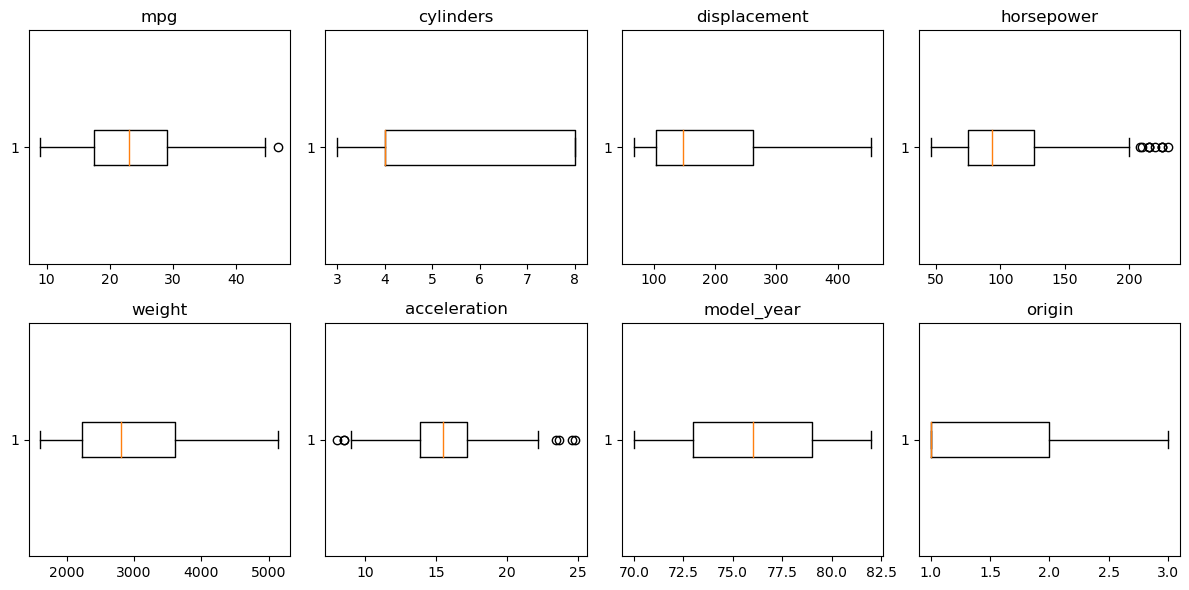

        Atribut         Mean     Max     Min   Modus  Missing Value
0           mpg    23.514573    46.6     9.0    13.0              0
1     cylinders     5.454774     8.0     3.0     4.0              0
2  displacement   193.425879   455.0    68.0    97.0              0
3    horsepower   104.469388   230.0    46.0   150.0              6
4        weight  2970.424623  5140.0  1613.0  1985.0              0
5  acceleration    15.568090    24.8     8.0    14.5              0
6    model_year    76.010050    82.0    70.0    73.0              0
7        origin     1.572864     3.0     1.0     1.0              0


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Definisikan nama kolom sebelum membaca data
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]

# Baca data dengan menggunakan pandas
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
auto_mpg_df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values='?')

# Daftar atribut yang akan dianalisis
attributes = columns[:-1]

# Hitung statistik deskriptif dan jumlah nilai yang hilang
desc_stats = auto_mpg_df[attributes].describe()
mode = auto_mpg_df[attributes].mode().iloc[0]
missing_vals = auto_mpg_df.isnull().sum()
nan_vals = auto_mpg_df.isna().sum()

print("Deskripsi Statistik:\n", desc_stats)
print("\nModus:\n", mode)
print("\nMissing Values:\n", missing_vals)
print("\nNaN Values:\n", nan_vals)

# Plot boxplot untuk setiap atribut
plt.figure(figsize=(12,6))
for idx, attr in enumerate(attributes):
    plt.subplot(2, 4, idx+1)
    plt.boxplot(auto_mpg_df[attr].dropna(), vert=False)
    plt.title(attr)
plt.tight_layout()
plt.show()

# Susun tabel ringkasan
summary_table = pd.DataFrame({
    'Atribut': attributes,
    'Mean': [auto_mpg_df[attr].mean() for attr in attributes],
    'Max': [auto_mpg_df[attr].max() for attr in attributes],
    'Min': [auto_mpg_df[attr].min() for attr in attributes],
    'Modus': [auto_mpg_df[attr].mode().iloc[0] for attr in attributes],
    'Missing Value': [auto_mpg_df[attr].isna().sum() for attr in attributes],
})

print(summary_table)


In [34]:
fill_missing_val = auto_mpg_df['horsepower'].fillna(auto_mpg_df['horsepower'].mode(),inplace=False)
print(fill_missing_val)

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64


Mean Squared Error: 19.6648641570341


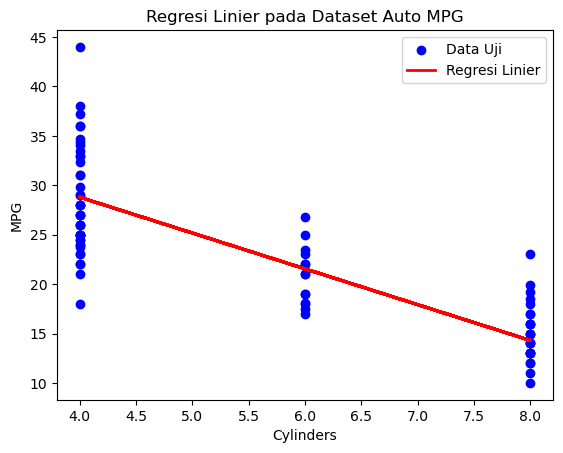

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Memperbaiki URL
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin", "Car Name"]

# Menggunakan separator atau delimiter yang tepat
df = pd.read_csv(url, sep='\s+', names=column_names)

# Hapus baris yang mengandung nilai null atau missing values
df = df.dropna()

X = df[['Cylinders']]
y = df['MPG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Menghitung dan mencetak Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Scatter plot data uji
plt.scatter(X_test, y_test, color='blue', label='Data Uji')

# Garis regresi linier
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regresi Linier')
plt.title('Regresi Linier pada Dataset Auto MPG')
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.legend()
plt.show()


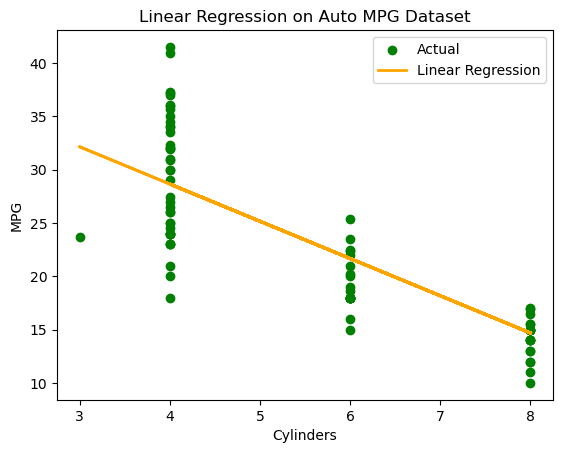

Mean Squared Error: 22.001737376880993


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
columns = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin", "Car Name"]
auto_data = pd.read_csv(data_url, delim_whitespace=True, names=columns)

# Define independent and dependent variables
X = auto_data[['Cylinders']]
y = auto_data['MPG']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
predictions = lr_model.predict(X_test)

# Visualize the results
plt.scatter(X_test, y_test, color='green', label='Actual')
plt.plot(X_test, predictions, color='orange', linewidth=2, label='Linear Regression')
plt.title('Linear Regression on Auto MPG Dataset')
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.legend(loc='upper right')
plt.show()

# Optionally, you can also compute and print the mean squared error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, Binarizer, StandardScaler

# Mengatur opsi print dari numpy
np.set_printoptions(precision=2, linewidth=100, suppress=True, threshold=10)

# Load the dataset
dataset_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_labels = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin", "Car Name"]
auto_mpg_data = pd.read_csv(dataset_url, delim_whitespace=True, names=column_labels)

# Applying Min-Max Scaling
min_max_scaler = MinMaxScaler()
weight_rescaled = min_max_scaler.fit_transform(auto_mpg_data[['Weight']])
print("Min-Max Scaled Data:\n", weight_rescaled)

# Applying Binarization with threshold 100
binarizer = Binarizer(threshold=100)
weight_binarized = binarizer.transform(auto_mpg_data[['Weight']])
print("Binarized Data:\n", weight_binarized)

# Applying Standardization
standard_scaler = StandardScaler()
weight_standardized = standard_scaler.fit_transform(auto_mpg_data[['Weight']])
print("Standardized Data:\n", weight_standardized)


Min-Max Scaled Data:
 [[0.54]
 [0.59]
 [0.52]
 ...
 [0.19]
 [0.29]
 [0.31]]
Binarized Data:
 [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
Standardized Data:
 [[ 0.63]
 [ 0.85]
 [ 0.55]
 ...
 [-0.8 ]
 [-0.41]
 [-0.3 ]]


C:\Users\randy\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(


In [5]:
# No.2 Reindexing
air_df = pd.read_csv('Preprocessing\TempData.csv')

air2016_df = air_df.drop(columns=['Year'])
air2016_df.set_index(['Month', 'Day', 'Time'],inplace=True)

air2016_df

Temp
Month Day Time          
1     1   00:00:00  79.0
          00:30:00  79.0
          01:00:00  79.0
          01:30:00  77.0
          02:00:00  78.0
...                  ...
12    31  22:00:00  77.0
          22:30:00  77.0
          23:00:00  77.0
          23:00:00  77.0
          23:30:00  77.0

[20453 rows x 1 columns]

In [6]:
# No.2 slicing data
air2016_df.loc[10,17,'21:30:00']

,,,Temp
Month,Day,Time,
10,17,21:30:00,79.0


In [7]:
# No.3 Mengubah Nama Kolom dan Baris
response_df = pd.read_csv('Preprocessing\OSMI Mental Health in Tech Survey 2019.csv')
response_df.head(1)

,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",...,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,What country do you *work* in?,What US state or territory do you *work* in?
0,False,26-100,True,True,I don't know,No,Yes,Yes,I don't know,Very easy,...,NaN,NaN,False,25,Male,United States of America,Nebraska,White,United States of America,Nebraska


In [8]:
response_df['Do you know the options for mental health care available under your employer-provided health coverage?']
keys = ['Q{}'.format(i) for i in range(1,83)]
columns_dic = pd.Series(response_df.columns,index=keys)
columns_dic['Q4']
response_df.columns = keys
response_df.head(1)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q73,Q74,Q75,Q76,Q77,Q78,Q79,Q80,Q81,Q82
0,False,26-100,True,True,I don't know,No,Yes,Yes,I don't know,Very easy,...,NaN,NaN,False,25,Male,United States of America,Nebraska,White,United States of America,Nebraska


In [9]:
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Oct', 'Sep', 'Nov', 'Dec']

def SeparateCity(v):
    for month in Months:
        if (month in v):
            return v[:v.find(month)]

pidato_df['City'] = pidato_df.FileName.apply(SeparateCity)
print(pidato_df['City'])

def SeparateDate(r):
    return r.FileName[len(r.City):r.FileName.find('.txt')]

pidato_df['Date'] = pidato_df.apply(SeparateDate, axis= 1)
pidato_df.Date = pd.to_datetime(pidato_df.Date, format= '%b%d_%Y')

def extractDMY (r):
    r['Day'] = r.Date.day
    r['Month'] = r.Date.month
    r['Year'] = r.Date.year
    return r

pidato_df = pidato_df.apply(extractDMY, axis= 1)
pidato_df.drop(columns=['FileName'], inplace= True)

pidato_df.head()
print(pidato_df)

0          BattleCreek
1     ColoradorSprings
2               Dallas
3         Fayetteville
4         Fayetteville
5           Greenville
6            Henderson
7             LasVegas
8              Latrobe
9            Lexington
10           Milwaukee
11              Minden
12         Minneapolis
13             Mosinee
14        NewHampshire
15        NewHampshire
16           NewMexico
17                Ohio
18          Pittsburgh
19               Texas
20              Tupelo
21       Winston-Salem
22                Yuma
Name: City, dtype: object
                                              Content              City  \
0   Thank you. Thank you. Thank you to Vice Presid...       BattleCreek   
1   Hello Colorado. We love Colorado, most beautif...  ColoradorSprings   
2   Thank you. Thank you very much. Hello Dallas. ...            Dallas   
3   What a crowd, what a crowd. Get those people o...      Fayetteville   
4    Thank you everybody. Thank you and Vice Presi...      Fayettevill

In [10]:
#Unpacking content
Words = ['vote','tax','campaign','economy']

def FindWordRatio(row):
    total_n_words = len(row.Content.split(' '))
    for w in Words:
        row['r_{}'.format(w)] = row.Content.count(w)/total_n_words
    return row

pidato_df = pidato_df.apply(FindWordRatio,axis=1)
pidato_df.head()

,Content,City,Date,Day,Month,Year,r_vote,r_tax,r_campaign,r_economy
0,Thank you. Thank you. Thank you to Vice Presid...,BattleCreek,2019-12-19,19,12,2019,0.000561,0.000505,0.000224,0.000617
1,"Hello Colorado. We love Colorado, most beautif...",ColoradorSprings,2020-02-20,20,2,2020,0.000772,0.000601,0.000172,0.000172
2,Thank you. Thank you very much. Hello Dallas. ...,Dallas,2019-10-17,17,10,2019,0.000475,0.000666,0.000571,0.000380
3,"What a crowd, what a crowd. Get those people o...",Fayetteville,2020-09-19,19,9,2020,0.001297,0.000185,0.000556,0.000185
4,Thank you everybody. Thank you and Vice Presi...,Fayetteville,2019-09-09,9,9,2019,0.002174,0.000652,0.000326,0.000652


0    [8, 0, 10, 10, 3, 11, 4, 13, 7, 7, 6, 9, 25, 4...
1    [0, 0, 23, 13, 9, 9, 0, 0, 0, 3, 3, 26, 12, 12...
dtype: object


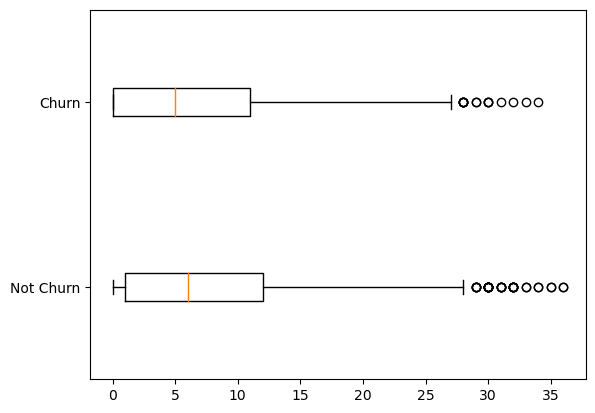

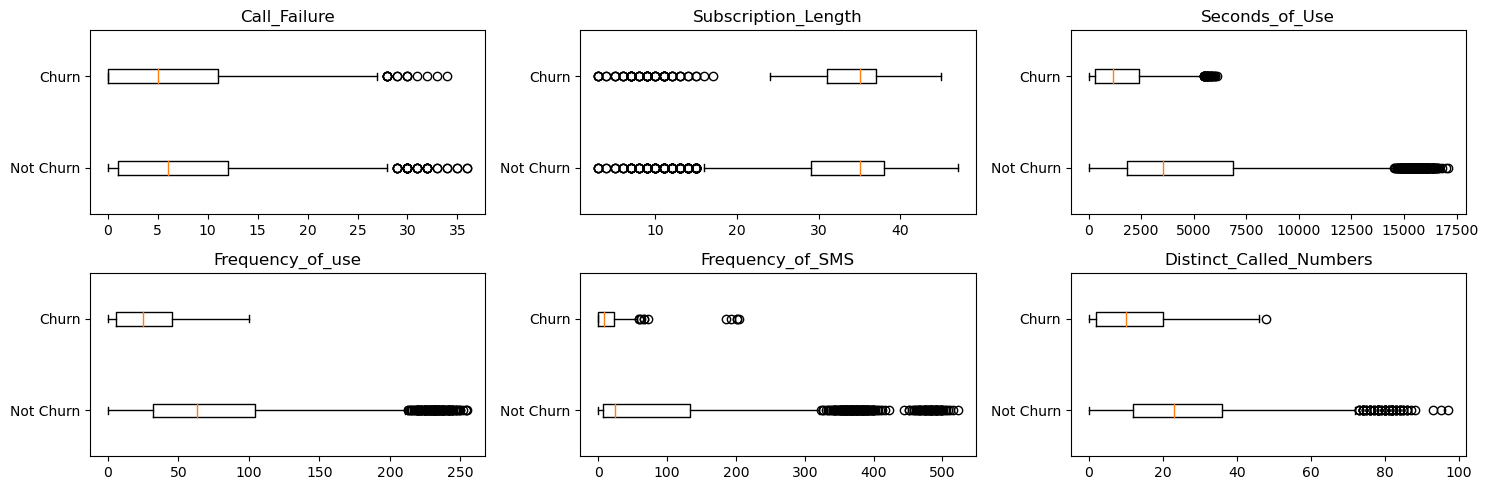

In [11]:
customer_df = pd.read_csv('Preprocessing/Customer Churn.csv')
customer_df.head(1)

customer_df.columns = ['Call_Failure', 'Complains', 'Subscription_Length', 'Seconds_of_Use', 'Frequency_of_use', 'Frequency_of_SMS', 'Distinct_Called_Numbers', 'Status', 'Churn']

churn_possibilities = customer_df.Churn.unique()

box_sr = pd.Series('',index = churn_possibilities)

for poss in churn_possibilities:
    BM = customer_df.Churn == poss
    box_sr[poss] = customer_df[BM].Call_Failure.values

#Plot data origin
print(box_sr)

plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],['Not Churn','Churn'])
plt.show()

#Restrukturisasi data
select_columns = ['Call_Failure', 'Subscription_Length', 'Seconds_of_Use', 'Frequency_of_use', 'Frequency_of_SMS', 'Distinct_Called_Numbers']

churn_possibilities = customer_df.Churn.unique()

plt.figure(figsize=(15,5))
for i,sc in enumerate(select_columns):
    for poss in churn_possibilities:
        BM = customer_df.Churn == poss
        box_sr[poss] = customer_df[BM][sc].values
    plt.subplot(2,3,i+1)
    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],['Not Churn','Churn'])
    plt.title(sc)
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd

names = ['Duration', 'Date', 'Pulse', 'Maxpulse', 'Calories']
df = pd.read_csv('Preprocessing/data.csv', names = names, sep = ',', header = None)
df.dropna(inplace = True)
print(df)

df['Date'] = pd.to_datetime(df['Date'])
print(df.to_string())

# Discover duplicate
print(df.duplicated())

# Remove all duplicates
df.drop_duplicates(inplace = True)

df.fillna(100, inplace = True)
print(df.to_string())

df["Calories"].fillna(100, inplace = True)
print(df.to_string())

x = df["Calories"].mean()
df["Calories"].fillna(x, inplace = True)
print(df.to_string())

    Duration          Date  Pulse  Maxpulse  Calories
0         60  '2020/12/01'    110       130     409.1
1         60  '2020/12/02'    117       145     479.0
2         60  '2020/12/03'    103       135     340.0
3         45  '2020/12/04'    109       175     282.4
4         45  '2020/12/05'    117       148     406.0
5         60  '2020/12/06'    102       127     300.0
6         60  '2020/12/07'    110       136     374.0
7        450  '2020/12/08'    104       134     253.3
8         30  '2020/12/09'    109       133     195.1
9         60  '2020/12/10'     98       124     269.0
10        60  '2020/12/11'    103       147     329.3
11        60  '2020/12/12'    100       120     250.7
12        60  '2020/12/12'    100       120     250.7
13        60  '2020/12/13'    106       128     345.3
14        60  '2020/12/14'    104       132     379.3
15        60  '2020/12/15'     98       123     275.0
16        60  '2020/12/16'     98       120     215.2
17        60  '2020/12/17'  

In [20]:
# Read RAW Data
month_df = pd.read_csv('Preprocessing/Electric_Production.csv')

month_df

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [21]:
# Open data "Columns"
column_df = pd.read_csv('Preprocessing/columns.csv')
column_df.head(2)

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,21.0,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow
612,5.0,3.0,5.0,1.0,1.0,3.0,2.0,3.0,4.0,3.0,...,23.0,172.0,110.0,2.0,male,right handed,secondary school,no,village,block of flats
715,4.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,...,29.0,183.0,111.0,1.0,male,left handed,secondary school,no,village,house/bungalow
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow
859,5.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,...,20.0,190.0,125.0,1.0,male,right handed,secondary school,no,city,block of flats
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
973,5.0,3.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,...,20.0,175.0,120.0,2.0,female,right handed,secondary school,no,city,block of flats
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


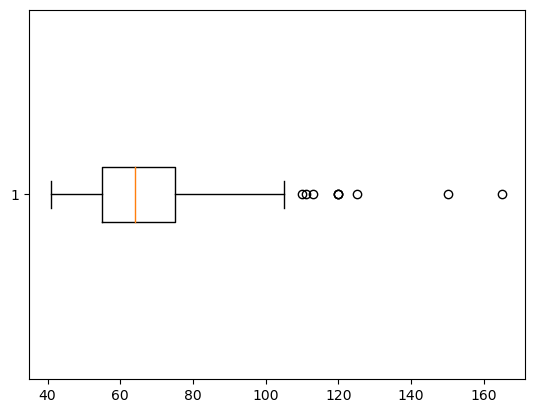

In [22]:
# Open data "Responses"
response_df = pd.read_csv('Preprocessing/responses.csv')
response_df.head(2)

#Mendeteksi outlier dari satu atribut numerik
fig = plt.boxplot(response_df.Weight.dropna(),vert=False)
response_df[response_df.Weight>105]

In [23]:
import pandas as pd
df = pd.read_csv('Preprocessing/data.csv')
df.dropna(inplace = True)
print(df.to_string())

     60  '2020/12/01'  110  130  409.1
0    60  '2020/12/02'  117  145  479.0
1    60  '2020/12/03'  103  135  340.0
2    45  '2020/12/04'  109  175  282.4
3    45  '2020/12/05'  117  148  406.0
4    60  '2020/12/06'  102  127  300.0
5    60  '2020/12/07'  110  136  374.0
6   450  '2020/12/08'  104  134  253.3
7    30  '2020/12/09'  109  133  195.1
8    60  '2020/12/10'   98  124  269.0
9    60  '2020/12/11'  103  147  329.3
10   60  '2020/12/12'  100  120  250.7
11   60  '2020/12/12'  100  120  250.7
12   60  '2020/12/13'  106  128  345.3
13   60  '2020/12/14'  104  132  379.3
14   60  '2020/12/15'   98  123  275.0
15   60  '2020/12/16'   98  120  215.2
16   60  '2020/12/17'  100  120  300.0
18   60  '2020/12/19'  103  123  323.0
19   45  '2020/12/20'   97  125  243.0
20   60  '2020/12/21'  108  131  364.2
22   60  '2020/12/23'  130  101  300.0
23   45  '2020/12/24'  105  132  246.0
24   60  '2020/12/25'  102  126  334.5
25   60    2020/12/26  100  120    0.0
26   60  '2020/12/27'   9

In [47]:
# No.8
# Convert to_datetime()
import pandas as pd

names = ['Duration','Date','Pulse','Maxpulse','Calories']

df = pd.read_csv('Preprocessing/data.csv', names = names, sep=',',header=None)

df['Date'] = pd.to_datetime(df['Date'])

print(df.to_string())

    Duration       Date  Pulse  Maxpulse  Calories
0         60 2020-12-01    110       130     409.1
1         60 2020-12-02    117       145     479.0
2         60 2020-12-03    103       135     340.0
3         45 2020-12-04    109       175     282.4
4         45 2020-12-05    117       148     406.0
5         60 2020-12-06    102       127     300.0
6         60 2020-12-07    110       136     374.0
7        450 2020-12-08    104       134     253.3
8         30 2020-12-09    109       133     195.1
9         60 2020-12-10     98       124     269.0
10        60 2020-12-11    103       147     329.3
11        60 2020-12-12    100       120     250.7
12        60 2020-12-12    100       120     250.7
13        60 2020-12-13    106       128     345.3
14        60 2020-12-14    104       132     379.3
15        60 2020-12-15     98       123     275.0
16        60 2020-12-16     98       120     215.2
17        60 2020-12-17    100       120     300.0
18        45 2020-12-18     90 

In [48]:
# No.9
# Convert to_datetime()
import pandas as pd

names = ['Duration','Date','Pulse','Maxpulse','Calories']
df = pd.read_csv('Preprocessing\data.csv', names = names, sep=',',header=None)
df['Date'] = pd.to_datetime(df['Date'])

print(df.to_string())

# Discover duplicate
print(df.duplicated())

# Remove all duplicates
df.drop_duplicates(inplace = True)

    Duration       Date  Pulse  Maxpulse  Calories
0         60 2020-12-01    110       130     409.1
1         60 2020-12-02    117       145     479.0
2         60 2020-12-03    103       135     340.0
3         45 2020-12-04    109       175     282.4
4         45 2020-12-05    117       148     406.0
5         60 2020-12-06    102       127     300.0
6         60 2020-12-07    110       136     374.0
7        450 2020-12-08    104       134     253.3
8         30 2020-12-09    109       133     195.1
9         60 2020-12-10     98       124     269.0
10        60 2020-12-11    103       147     329.3
11        60 2020-12-12    100       120     250.7
12        60 2020-12-12    100       120     250.7
13        60 2020-12-13    106       128     345.3
14        60 2020-12-14    104       132     379.3
15        60 2020-12-15     98       123     275.0
16        60 2020-12-16     98       120     215.2
17        60 2020-12-17    100       120     300.0
18        45 2020-12-18     90 

In [51]:
# No.10
#Open data "Columns"
column_df = pd.read_csv('Preprocessing\columns.csv')
column_df.head(2)

# No.11
import pandas as pd
df = pd.read_csv('Preprocessing\columns.csv')
df.fillna(100, inplace = True)
print(df.to_string())

# No.12
# Convert to_datetime()
import pandas as pd
names = ['Duration','Date','Pulse','Maxpulse','Calories']
df = pd.read_csv(r'C:\Users\naufa\Downloads\data.csv', names = names, sep=',',header=None)
df["Calories"].fillna(100, inplace = True)
print(df.to_string())

# No.13
# Convert to_datetime()
import pandas as pd

names = ['Duration','Date','Pulse','Maxpulse','Calories']
df = pd.read_csv(r'C:\Users\naufa\Downloads\data.csv', names = names, sep=',',header=None)
x = df["Calories"].mean()
df["Calories"].fillna(x, inplace = True)

print(df.to_string())

# No.14
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler

# Open data set
url = 'Preprocessing\data.csv'

# data parameters
names = ['Duration','Date','Pulse','Maxpulse','Calories']

# preparation of dataframe using the data at given link and defined columns list
dataframe = pandas.read_csv(url, names = names)
array = dataframe.values

# Select column to rescale
calories = array[:,4].reshape(-1,4)

# Rescaling data
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(calories)
print(rescaledX)

#No.15
import pandas
import scipy
import numpy
from sklearn.preprocessing import Binarizer

# Open data set
url = 'Preprocessing\data.csv'

# data parameters
names = ['Duration','Date','Pulse','Maxpulse','Calories']

# preparation of dataframe using the data at given link and defined columns list
dataframe = pandas.read_csv(url, names = names)
array = dataframe.values

# Select column to rescale
pulse = array[:,2].reshape(-1,4)

# Binarize data
binarizer = Binarizer(threshold = 100.0).fit(pulse)
binaryX = binarizer.transform(pulse)
print (binaryX)

# No.16
import pandas
import scipy
import numpy
from sklearn.preprocessing import StandardScaler

# Open data set
url = 'Preprocessing\data.csv'

# data parameters
names = ['Duration','Date','Pulse','Maxpulse','Calories']
dataframe = pd.read_csv(url, names = names)
array = dataframe.values
calories = array[:,4].reshape(-1,1)
scaler = StandardScaler().fit(calories)
rescaledX = scaler.transform(calories)
print(rescaledX)


                                                                            original                           short
0                                                        I enjoy listening to music.                           Music
1                                                                          I prefer.        Slow songs or fast songs
2                                                                 Dance, Disco, Funk                           Dance
3                                                                         Folk music                            Folk
4                                                                            Country                         Country
5                                                                          Classical                 Classical music
6                                                                           Musicals                         Musical
7                                                               

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\naufa\\Downloads\\data.csv'